In [1]:
import numpy as np
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [5]:
iris_X, iris_y = iris.data, iris.target

In [6]:
np.unique(iris_y)

array([0, 1, 2])

###  1 K-Nearest neighbors classifier

In [7]:
len(iris_X)

150

In [8]:
np.random.seed(0)

In [9]:
#create a random permutation
indices = np.random.permutation(len(iris_X))

In [15]:
X_train = iris_X[indices[:-10]]
y_train = iris_y[indices[:-10]]
X_test = iris_X[indices[-10:]]
y_test = iris_y[indices[-10:]]

In [11]:
#create and fit a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
knn.predict(X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [16]:
y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

#### ps 注意维灾难问题 curse of dimensionality

### 2 Linear model

In [17]:
diabetes = datasets.load_diabetes()

In [19]:
diabetes_X_train = diabetes.data[:-20]
diabetes_y_train = diabetes.target[:-20]
diabetes_X_test = diabetes.data[-20:]
diabetes_y_test = diabetes.target[-20:]

#### Linear regression 

In [20]:
from sklearn import linear_model

In [21]:
regr = linear_model.LinearRegression()

In [22]:
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
print(regr.coef_)

[  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]


In [25]:
#mean square error 标准方差
np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2)

2004.5676026898225

In [27]:
import seaborn as sns
%matplotlib inline

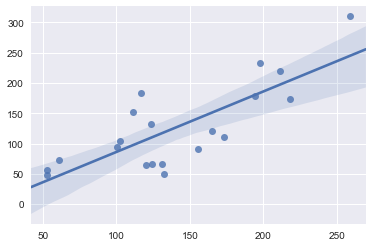

In [29]:
sns.regplot(x=regr.predict(diabetes_X_test), y = diabetes_y_test)

In [30]:
regr.score(diabetes_X_test, diabetes_y_test)

0.58507530226905713

Ridge回归：对于多维数据而言，一些维度的属性对result的影响很小，因此需要降低这些维度的影响力。类似的还有Lasso回归

In [31]:
regr = linear_model.Lasso()

In [32]:
alphas = np.logspace(-4, -1, 6)
scores = [regr.set_params(alpha=alpha).fit(diabetes_X_train, diabetes_y_train).score(diabetes_X_test, diabetes_y_test)
         for alpha in alphas]

In [33]:
# find best alpha value
best_alpha = alphas[scores.index(max(scores))]

In [34]:
regr.alpha = best_alpha

In [35]:
regr.fit(diabetes_X_train, diabetes_y_train)

Lasso(alpha=0.025118864315095794, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
regr.coef_

array([   0.        , -212.43764548,  517.19478111,  313.77959962,
       -160.8303982 ,   -0.        , -187.19554705,   69.38229038,
        508.66011217,   71.84239008])

In [38]:
regr.score(diabetes_X_test, diabetes_y_test)

0.58876224183092618

#### Classification 

In [39]:
#parameter C control the amount of the regularization
logistic = linear_model.LogisticRegression(C=1e5)

In [40]:
logistic.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

### 3 SVM 

In [41]:
#plot different SVM classifiers with iris dataset

In [42]:
X = iris.data[:,:2]
y = iris.target

In [44]:
h = .02  # step size in the mesh
C = 1.0 # SVM regularization parameter

In [45]:
from sklearn import svm

In [46]:
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma =0.7, C=C).fit(X,y)
poly_svc = svm.SVC(kernel = 'poly',degree=3, C=C).fit(X,y)
lin_svc = svm.LinearSVC(C=C).fit(X,y)

In [47]:
import matplotlib.pyplot as plt

In [48]:
x_min, x_max = X[:,0].min() -1, X[:,0].max()+1
y_min, y_max = X[:,1].min() -1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

In [49]:
#titles for 4 plots
titles = ['SVC with linear kernel', 
          'LinearSVC(linear kernel)',
         'SVC with rbf kernel',
         'SVC with polynomial(degree 3) kernel']

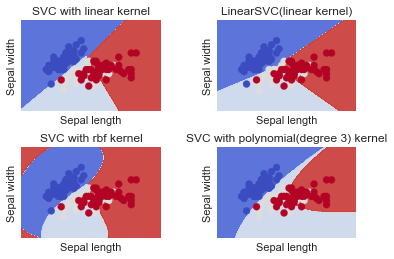

In [53]:
for i ,clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    plt.subplot(2,2, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.9)
    
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    
plt.show()

In [55]:
logistic.score(X_test, y_test)

0.90000000000000002